Theo Filus Handy S - 0706022210051

In [111]:
#Import Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [112]:
#Load Dataset

df = pd.read_csv("https://raw.githubusercontent.com/tfilushandy/DATASET-DM-WEEK-6/refs/heads/main/breast-cancer.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [114]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [115]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [116]:
df.sample(n=10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
166,87127,B,10.800,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,...,11.60,12.02,73.66,414.0,0.1436,0.12570,0.10470,0.04603,0.2090,0.07699
91,861799,M,15.370,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,...,16.43,25.84,107.50,830.9,0.1257,0.19970,0.28460,0.14760,0.2556,0.06828
57,857793,M,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,...,17.87,30.70,115.70,985.5,0.1368,0.42900,0.35870,0.18340,0.3698,0.10940
259,88725602,M,15.530,33.56,103.70,744.9,0.10630,0.16390,0.17510,0.08399,...,18.49,49.54,126.30,1035.0,0.1883,0.55640,0.57030,0.20140,0.3512,0.12040
566,926954,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.98,34.12,126.70,1124.0,0.1139,0.30940,0.34030,0.14180,0.2218,0.07820
393,903516,M,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,...,26.23,28.74,172.00,2081.0,0.1502,0.57170,0.70530,0.24220,0.3828,0.10070
147,86973701,B,14.950,18.77,97.84,689.5,0.08138,0.11670,0.09050,0.03562,...,16.25,25.47,107.10,809.7,0.0997,0.25210,0.25000,0.08405,0.2852,0.09218
299,892399,B,10.510,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.01875,...,10.93,24.22,70.10,362.7,0.1143,0.08614,0.04158,0.03125,0.2227,0.06777
476,911654,B,14.200,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,...,16.45,27.26,112.10,828.5,0.1153,0.34290,0.25120,0.13390,0.2534,0.07858
504,915186,B,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,...,10.28,16.38,69.05,300.2,0.1902,0.34410,0.20990,0.10250,0.3038,0.12520


In [117]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

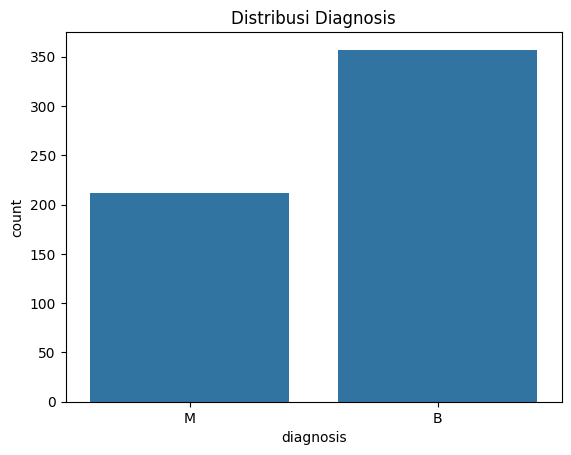

In [118]:
# Visualisasi distribusi diagnosis
sns.countplot(x='diagnosis', data=df)
plt.title('Distribusi Diagnosis')
plt.show()

<Axes: xlabel='radius_mean', ylabel='area_mean'>

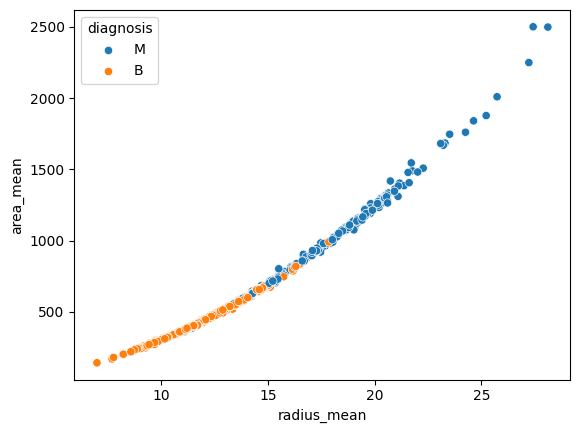

In [119]:
#Scatter Plot untuk Pasangan Fitur
sns.scatterplot(x='radius_mean', y='area_mean', hue='diagnosis', data=df)

Ada hubungan linier positif yang sangat kuat antara radius_mean dan area_mean, yang artinya semakin besar rata-rata jari-jari (radius), semakin besar pula rata-rata luas (area).
Polanya terlihat seperti hubungan kuadratik atau eksponensial, di mana peningkatan radius_mean diikuti dengan peningkatan area_mean yang lebih besar, konsisten dengan formula area lingkaran yang sebanding dengan kuadrat jari-jari.

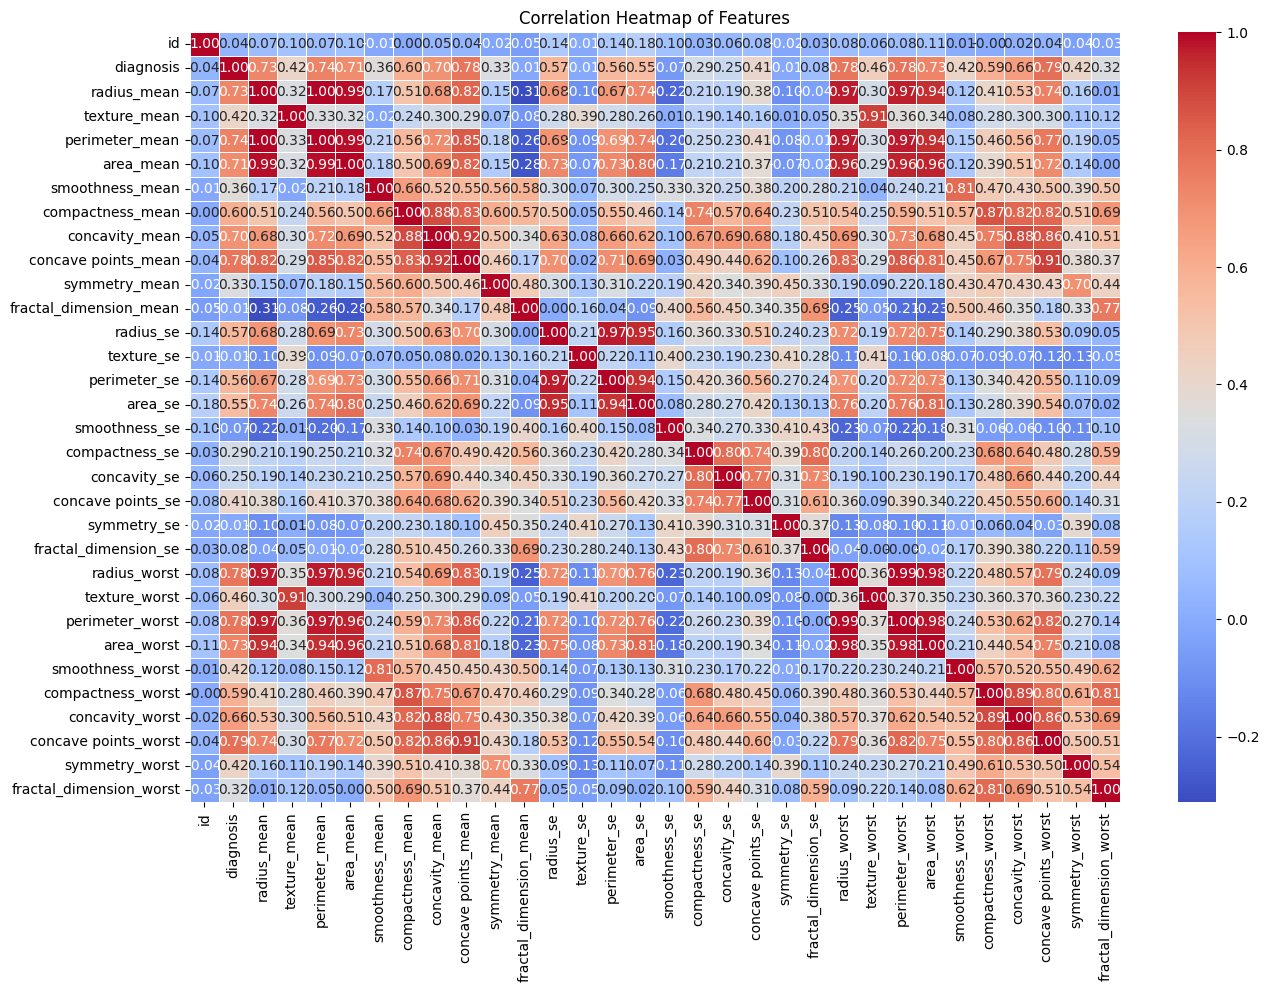

In [120]:
# Mengubah diagnosis menjadi numerik jika belum (misalnya B=0, M=1)
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [121]:
# Preprocessing
# Encode kolom diagnosis
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # B=0, M=1

In [122]:
df.sample(n=10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
336,897604,0,12.99,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.02098,...,13.72,16.91,87.38,576.0,0.1142,0.1975,0.1450,0.05850,0.2432,0.10090
10,845636,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
370,9012315,1,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,...,19.38,31.03,129.30,1165.0,0.1415,0.4665,0.7087,0.22480,0.4824,0.09614
249,884689,0,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
533,91930402,1,20.47,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.10150,...,23.23,27.15,152.00,1645.0,0.1097,0.2534,0.3092,0.16130,0.3220,0.06386
312,89382602,0,12.76,13.37,82.29,504.1,0.08794,0.07948,0.04052,0.02548,...,14.19,16.40,92.04,618.8,0.1194,0.2208,0.1769,0.08411,0.2564,0.08253
34,854039,1,16.13,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,...,20.21,27.26,132.70,1261.0,0.1446,0.5804,0.5274,0.18640,0.4270,0.12330
210,881046502,1,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,...,23.24,27.84,158.30,1656.0,0.1178,0.2920,0.3861,0.19200,0.2909,0.05865
437,909220,0,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,...,15.66,21.58,101.20,750.0,0.1195,0.1252,0.1117,0.07453,0.2725,0.07234
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.22160,0.2060,0.07115


In [123]:
# Standarisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [124]:
# Memisahkan fitur (X) dan label (y)
X = df.drop(['id', 'diagnosis'], axis=1)  # Menghapus kolom 'id' dan 'diagnosis' dari fitur
y = df['diagnosis']  # Mengambil kolom diagnosis sebagai label


In [125]:
# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [126]:
# Inisialisasi Decision Tree dengan entropi sebagai kriterianya
clf_entro = DecisionTreeClassifier(criterion='entropy')

In [127]:
clf_entro = DecisionTreeClassifier(criterion='entropy', max_depth=3)  # Batasi kedalaman pohon


In [128]:
# Melatih model
clf_entro.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [105]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [130]:
print('Model accuracy score with criterion Entro index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entro)))

Model accuracy score with criterion Entro index: 0.6228


In [129]:
# Evaluasi model
print('Training set score: {0:0.4f}'.format(clf_entro.score(X_train, y_train)))
print('Test set score: {0:0.4f}'.format(clf_entro.score(X_test, y_test)))

Training set score: 0.9802
Test set score: 0.9561


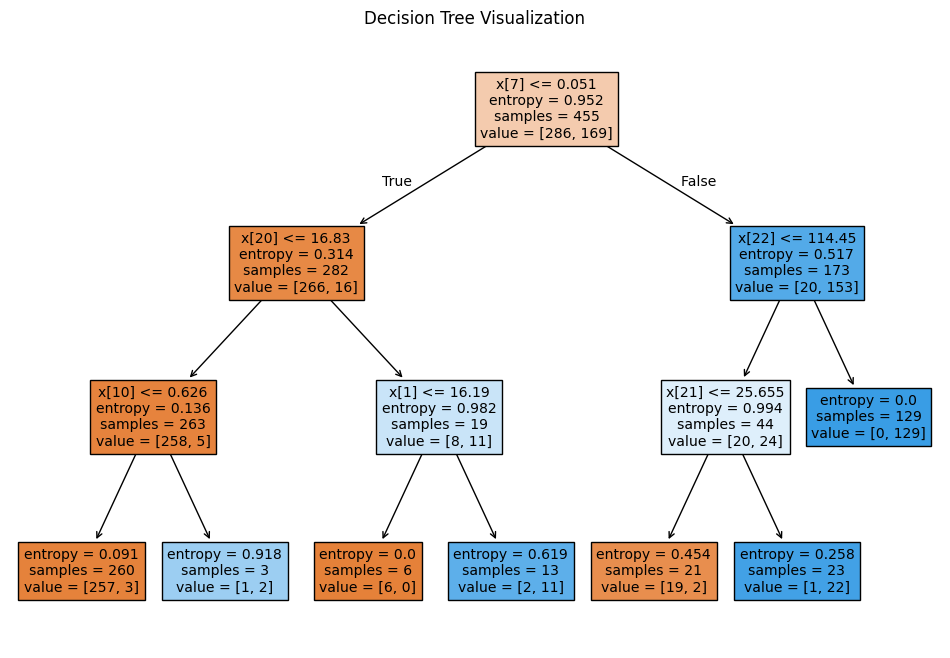

In [131]:
plt.figure(figsize=(12, 8))
plot_tree(clf_entro, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# 2 **LAINNYA**

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [133]:
# Model 2: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [134]:
# Model 3: Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



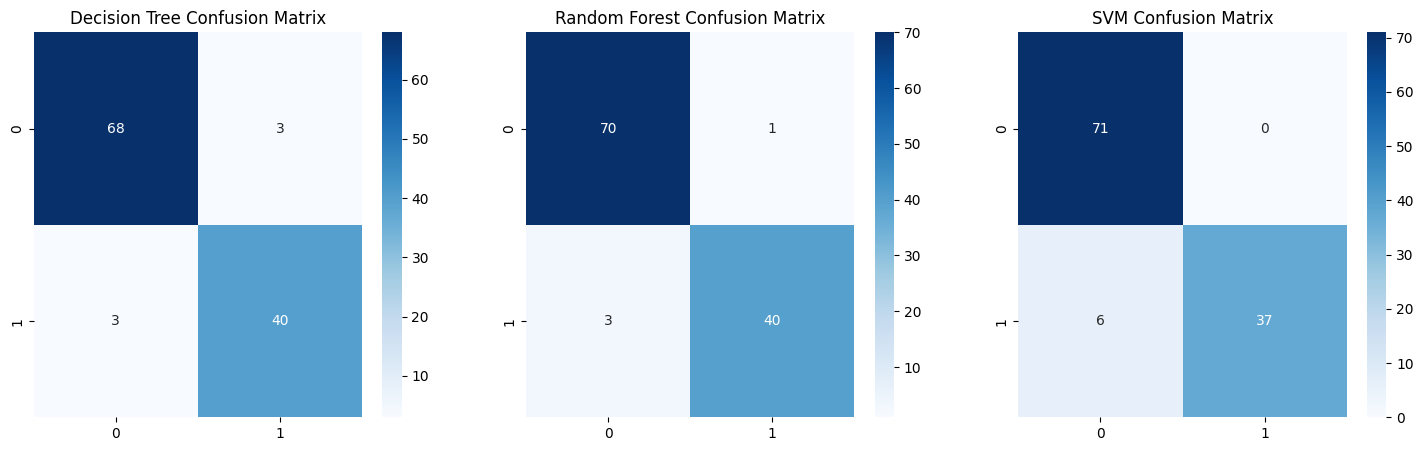

In [135]:
# Confusion Matrix Visualization for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Decision Tree Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree Confusion Matrix')

# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')

# SVM Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('SVM Confusion Matrix')

plt.show()

Random Forest dan SVM memiliki performa yang lebih baik dibandingkan Decision Tree, terutama dalam memprediksi kelas 0.
SVM memiliki sedikit keunggulan dalam prediksi kelas 1 dibandingkan Random Forest dan Decision Tree.
Random Forest dan SVM menghasilkan lebih sedikit kesalahan dibandingkan Decision Tree, yang menunjukkan kemampuan model ensambel dan margin pemisahan SVM yang lebih baik untuk dataset ini.